# Book Recommendation System

# Table of Contents

1. [Obtain](#1-Obtain-:-Web-Scraping-from-Google-Books)
2. [Scrub](#2-Scrub-:-Data-Cleaning)
3. [Explore](#3-Explore-:-Exploratory-Data-Analysis)

# 1 Obtain : Web Scraping from Google Books

In [1]:
import requests
import pandas as pd

# Book Genre Keywords
genre_list = ['invest', 'memoirs', 'art', 'entertainment', 'business', 'biography', 'children', 'comics', 'computers', \
              'technology', 'cooking', 'food', 'wine', 'education', 'fiction', 'literature', 'language', 'health', \
              'psychology', 'history', 'parenting', 'families', 'romance', 'science', 'travel', 'self-help', 'sports', \
              'young adult', 'science fiction', 'action', 'adventure', 'fantasy', 'mystery', 'horror', 'thriller', \
              'contemporary', 'literary', 'short story', 'crime', 'humor', 'guide', 'religion', 'mathematics', 'biology', \
              'physics', 'aerology', 'magic', 'dystopian', 'classic', 'tragedy', 'fairy tale', 'satire', 'biography', \
              'narrative', 'encyclopedia', 'politics', 'poetry', 'social science', 'detective', 'creative', 'spiritual',\
              'prose', 'autobiography', 'graphic', 'paranormal romance', 'home and garden', 'economics', 'finance', \
              'diary', 'leisure', 'suspense', 'drama', 'culture', 'short story', 'music', 'review', 'philosophy', \
              'fitness', 'dictionary', 'LGBTQ+', 'utopian', 'western', 'photography', 'DIY', 'how-to', 'motivational', \
              'craft', 'relationship', 'law', 'criminology', 'opera', 'film', 'wedding', 'dance', 'comedy', 'programming',\
              'automotive', 'manga', 'revolution', 'chick lit', 'architecture', 'alternate history', 'anthology', \
              'hobbies', 'culinary', 'realism', 'dark fantasy', 'mythology', 'body horror', 'gothic', 'paranormal', \
              'saga', 'epic', 'urban', 'heroic', 'noir', 'supernatural', 'police', 'medical', 'time travel', \
              'apocalypse', 'colonization', 'colony', 'biblical', 'military', 'steampunk', 'space', 'exploration', \
              'nature', 'plants', 'animals', 'alternate dimension', 'parallel world', 'conspiracy', 'forensic', \
              'espionage', 'eastern', 'women', 'POC', 'true crime', 'ghost', 'legend', 'pirate', 'parody', 'pop culture', \
              'self-insert', 'spy', 'superhero', 'survival', 'city', 'occult', 'zombie', 'feminist', 'mecha', 'academic', \
              'data-driven', 'environmental', 'fashion', 'trade', 'world', 'video games', 'global', 'gossip', 'monster', \
              'alien']

# Book Dict to store books based on genre
book_dict = {}

# Use loop to find books from each genre in genre list and put in dataframe
for genre in genre_list:
    # loop through index with increment by 40 (max fetch is 40 each time) until 2000
    for idx in range(0, 1000, 40):
        api_url = 'https://www.googleapis.com/books/v1/volumes?q='+genre+'+book&printType=books&langRestrict=en&startIndex='+str(idx)+'&maxResults=40'
        response = requests.get(api_url)
        # retrieve data only if the response is success
        if response.status_code == 200:
            data = response.json()
            # check if the book information is in the json file (may not have the info sometimes)
            # only put data into list if there is info
            if 'items' in data:
                # assign item list if the genre key is not in the book_dict, otherwise extend it
                if genre not in book_dict:
                    # book_dict[genre] = pd.DataFrame.from_dict(pd.json_normalize(data['items']), orient='columns')
                    book_dict[genre] = data['items']
                else:
                    # book_dict[genre] = book_dict[genre].append(pd.json_normalize(data['items']), ignore_index=True)
                    book_dict[genre].extend(data['items'])
        else:
            print("Request Error for", genre, ":", response.status_code)

In [2]:
# check the books count for each genre
for book, ls in book_dict.items():
    print("Books count for", book,": ",len(ls))

Books count for invest :  662
Books count for memoirs :  701
Books count for art :  663
Books count for entertainment :  746
Books count for business :  651
Books count for biography :  1338
Books count for children :  618
Books count for comics :  682
Books count for computers :  703
Books count for technology :  684
Books count for cooking :  681
Books count for food :  692
Books count for wine :  645
Books count for education :  658
Books count for fiction :  603
Books count for literature :  646
Books count for language :  746
Books count for health :  670
Books count for psychology :  661
Books count for history :  663
Books count for parenting :  653
Books count for families :  716
Books count for romance :  743
Books count for science :  649
Books count for travel :  683
Books count for self-help :  649
Books count for sports :  715
Books count for young adult :  659
Books count for science fiction :  662
Books count for action :  736
Books count for adventure :  701
Books count

In [3]:
# cross-check if the list is correct and as expected
for book, ls in book_dict.items():
    if book == 'art':
        print(*ls, sep = "\n")

{'kind': 'books#volume', 'id': 'bltTPgAACAAJ', 'etag': 'sRoK56zFBbQ', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/bltTPgAACAAJ', 'volumeInfo': {'title': 'The Art Book', 'authors': ['Editors of Phaidon Press'], 'publisher': 'Phaidon Press', 'publishedDate': '2005-03-02', 'description': "Depicts five hundred paintings and sculptures from the Middle Ages to the present, each by a different artist, in alphabetical order by artist, with a brief description of the work and its place in art history and in the artist's career.", 'industryIdentifiers': [{'type': 'ISBN_10', 'identifier': '071484487X'}, {'type': 'ISBN_13', 'identifier': '9780714844879'}], 'readingModes': {'text': False, 'image': False}, 'pageCount': 512, 'printType': 'BOOK', 'categories': ['Art'], 'averageRating': 4, 'ratingsCount': 9, 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': False, 'contentVersion': 'preview-1.0.0', 'imageLinks': {'smallThumbnail': 'http://books.google.com/books/content?id=bltTPgAACAAJ&pr

In [4]:
# Put all books into a master list, then convert into dataframe
# create an empty list
book_list = []

# put all books in book_list
for ls in book_dict.values():
    book_list.extend(ls)

# convert book master list into dataframe
book_df = pd.DataFrame.from_dict(pd.json_normalize(book_list), orient='columns')
display(book_df)

# put in csv file
book_df.to_csv('books.csv')

,kind,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,...,volumeInfo.ratingsCount,accessInfo.epub.downloadLink,accessInfo.pdf.downloadLink,volumeInfo.panelizationSummary.imageBubbleVersion,volumeInfo.comicsContent,volumeInfo.seriesInfo.kind,volumeInfo.seriesInfo.bookDisplayNumber,volumeInfo.seriesInfo.volumeSeries,volumeInfo.panelizationSummary.epubBubbleVersion,volumeInfo.seriesInfo.shortSeriesBookTitle
0,books#volume,eIJiDwAAQBAJ,1xcHQ4mb0QM,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,[Tariq Dennison],Springer,2018-06-28,This book is a practical and concise guide to ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,books#volume,UacEEAAAQBAJ,pQzVcEsJ4kI,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,"Finance experts reveal how they save, spend, a...","[Brian Portnoy, Joshua Brown]",Harriman House Limited,2020-11-17,The world of investing normally sees experts t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,books#volume,pNI4DwAAQBAJ,2V7L2ChAUb4,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"[Peir Shenq (Stanley) Lim, Mun Hong Cheong]",John Wiley & Sons,2017-10-06,"A practical, step-by-step guide to value inves...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,books#volume,DBeCEAAAQBAJ,GzHy/Dvmvl0,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,[David M. Rubenstein],Simon and Schuster,2022-09-13,"""What do the most successful investors have in...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,books#volume,5qCaDwAAQBAJ,7xVJ4bf3Hfc,https://www.googleapis.com/books/v1/volumes/5q...,Simply Invest,Naked Truths to Grow Your Money,[Goh Yang Chye],Epigram Books,2019,"A pioneer in financial planning in Singapore, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112828,books#volume,6VJVzQEACAAJ,QSd3SJ2ZDRk,https://www.googleapis.com/books/v1/volumes/6V...,Jelly Roll,NaN,[Mere Joyce],Orca Currents,2020-08-18,In this high-interest novel for middle readers...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112829,books#volume,o2SGzQEACAAJ,V63mueCDdng,https://www.googleapis.com/books/v1/volumes/o2...,AVP,Alien Vs. Predator : Novelization,[Marc Cerasini],NaN,2004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112830,books#volume,yvN2swEACAAJ,+xsRECtvDuI,https://www.googleapis.com/books/v1/volumes/yv...,The Puppet Masters,NaN,[Robert Anson Heinlein],Macmillan Reference USA,1979,Earth was being invaded by aliens and the top ...,...,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112831,books#volume,LdJnvgEACAAJ,xCWmXO/RtbU,https://www.googleapis.com/books/v1/volumes/Ld...,Missing Time,A Documented Study of UFO Abductions,[Budd Hopkins],Berkley,1983,The arrival of extraterrestrial visitors is on...,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2 Scrub : Data Cleaning

## Data Understanding

In [1]:
import pandas as pd

# read data from the saved CSV file
book_df = pd.read_csv('books.csv')

C:\Users\60124\AppData\Local\Temp\ipykernel_13808\1815457541.py:4: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  book_df = pd.read_csv('books.csv')


In [2]:
# Check the rows and columns of the dataframe
print("Number of rows and columns: ", book_df.shape)

Number of rows and columns:  (17846, 61)


In [3]:
# Display dataframe
display(book_df)

,Unnamed: 0,kind,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.publishedDate,...,volumeInfo.ratingsCount,accessInfo.epub.downloadLink,accessInfo.pdf.downloadLink,volumeInfo.panelizationSummary.imageBubbleVersion,volumeInfo.comicsContent,volumeInfo.seriesInfo.kind,volumeInfo.seriesInfo.bookDisplayNumber,volumeInfo.seriesInfo.volumeSeries,volumeInfo.panelizationSummary.epubBubbleVersion,volumeInfo.seriesInfo.shortSeriesBookTitle
0,0,books#volume,eIJiDwAAQBAJ,7eUC+F2f/oc,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,['Tariq Dennison'],Springer,2018-06-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,books#volume,pNI4DwAAQBAJ,gNxX580ga+c,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"['Peir Shenq (Stanley) Lim', 'Mun Hong Cheong']",John Wiley & Sons,2017-10-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,books#volume,DBeCEAAAQBAJ,214aKRKLxeg,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,['David M. Rubenstein'],Simon and Schuster,2022-09-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,books#volume,UacEEAAAQBAJ,hLXTtmlAAJs,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,"Finance experts reveal how they save, spend, a...","['Brian Portnoy', 'Joshua Brown']",Harriman House Limited,2020-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,books#volume,zDVCEAAAQBAJ,Tpdm+XcNuXY,https://www.googleapis.com/books/v1/volumes/zD...,The NFT Handbook,"How to Create, Sell and Buy Non-Fungible Tokens","['QuHarrison Terry', 'Matt Fortnow']",John Wiley & Sons,2021-09-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17841,17841,books#volume,-zymG38WzAgC,8aZFMiSWG1w,https://www.googleapis.com/books/v1/volumes/-z...,Contemporary Dystopian Fiction for Young Adults,Brave New Teenagers,"['Balaka Basu', 'Katherine R. Broad', 'Carrie ...",Routledge,2013-05-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17842,17842,books#volume,G7QLAQAAMAAJ,2b0LzvgZH9M,https://www.googleapis.com/books/v1/volumes/G7...,Encyclopedia of American Literature,NaN,"['Steven Serafin', 'Alfred Bendixen']",Burns & Oates,1999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17843,17843,books#volume,kS98AQAACAAJ,n5w5wPsl/ZA,https://www.googleapis.com/books/v1/volumes/kS...,Slaughterhouse-five,"Or, The Children's Crusade: a Duty-dance with ...",['Kurt Vonnegut'],NaN,2006,...,1545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17844,17844,books#volume,u_rpyQEACAAJ,RlsDn34pYck,https://www.googleapis.com/books/v1/volumes/u_...,Lakewood,A Novel,['Megan Giddings'],Amistad,2021-03-16,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# drop the Unnamed column
book_df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
# columns and its data types in dataframe
book_df.dtypes

kind                                                    object
id                                                      object
etag                                                    object
selfLink                                                object
volumeInfo.title                                        object
volumeInfo.subtitle                                     object
volumeInfo.authors                                      object
volumeInfo.publisher                                    object
volumeInfo.publishedDate                                object
volumeInfo.description                                  object
volumeInfo.industryIdentifiers                          object
volumeInfo.readingModes.text                              bool
volumeInfo.readingModes.image                             bool
volumeInfo.pageCount                                   float64
volumeInfo.printType                                    object
volumeInfo.categories                                  

In [6]:
print(book_df.applymap(type))

                kind             id           etag       selfLink  \
0      <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
1      <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
2      <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
3      <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
4      <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
...              ...            ...            ...            ...   
17841  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
17842  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
17843  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
17844  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
17845  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   

      volumeInfo.title volumeInfo.subtitle volumeInfo.authors  \
0        <class 'str'>       <class 'str'>      <class 'str'>   
1        <class 'str'>       <class 'str'

## Data Cleaning

### Data Reduction

In [7]:
# Attribute list to drop
to_drop = ['kind', 'volumeInfo.printType', 'volumeInfo.allowAnonLogging', 'volumeInfo.allowAnonLogging' \
           , 'volumeInfo.contentVersion', 'volumeInfo.panelizationSummary.containsEpubBubbles' \
           , 'volumeInfo.panelizationSummary.containsImageBubbles', 'volumeInfo.imageLinks.smallThumbnail' \
           , 'volumeInfo.imageLinks.thumbnail', 'volumeInfo.previewLink', 'volumeInfo.infoLink' \
           , 'volumeInfo.canonicalVolumeLink', 'saleInfo.buyLink', 'saleInfo.offers', 'accessInfo.country' \
           , 'accessInfo.epub.acsTokenLink', 'accessInfo.pdf.acsTokenLink', 'accessInfo.webReaderLink' \
           , 'accessInfo.quoteSharingAllowed', 'accessInfo.epub.downloadLink', 'accessInfo.pdf.downloadLink' \
           , 'volumeInfo.panelizationSummary.imageBubbleVersion', 'volumeInfo.comicsContent', 'volumeInfo.seriesInfo.kind' \
           , 'volumeInfo.seriesInfo.bookDisplayNumber', 'volumeInfo.seriesInfo.volumeSeries' \
           , 'volumeInfo.panelizationSummary.epubBubbleVersion', 'volumeInfo.seriesInfo.shortSeriesBookTitle']

# Drop unused columns
book_df.drop(to_drop, axis=1, inplace=True)
display(book_df.head())

,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,accessInfo.viewability,accessInfo.embeddable,accessInfo.publicDomain,accessInfo.textToSpeechPermission,accessInfo.epub.isAvailable,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount
0,eIJiDwAAQBAJ,7eUC+F2f/oc,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,['Tariq Dennison'],Springer,2018-06-28,This book is a practical and concise guide to ...,"[{'type': 'ISBN_13', 'identifier': '9789811303...",...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,This book is a practical and concise guide to ...,NaN,NaN
1,pNI4DwAAQBAJ,gNxX580ga+c,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"['Peir Shenq (Stanley) Lim', 'Mun Hong Cheong']",John Wiley & Sons,2017-10-06,"A practical, step-by-step guide to value inves...","[{'type': 'ISBN_13', 'identifier': '9781119391...",...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,Ltd. &quot;Stanley Lim and Mun Hong have skill...,NaN,NaN
2,DBeCEAAAQBAJ,214aKRKLxeg,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,['David M. Rubenstein'],Simon and Schuster,2022-09-13,"""What do the most successful investors have in...","[{'type': 'ISBN_13', 'identifier': '9781982190...",...,PARTIAL,True,False,ALLOWED_FOR_ACCESSIBILITY,False,False,SAMPLE,"David M. Rubenstein, cofounder of one of the w...",NaN,NaN
3,UacEEAAAQBAJ,hLXTtmlAAJs,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,"Finance experts reveal how they save, spend, a...","['Brian Portnoy', 'Joshua Brown']",Harriman House Limited,2020-11-17,The world of investing normally sees experts t...,"[{'type': 'ISBN_13', 'identifier': '9780857198...",...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,"Sometimes raw, always revealing, these stories...",NaN,NaN
4,zDVCEAAAQBAJ,Tpdm+XcNuXY,https://www.googleapis.com/books/v1/volumes/zD...,The NFT Handbook,"How to Create, Sell and Buy Non-Fungible Tokens","['QuHarrison Terry', 'Matt Fortnow']",John Wiley & Sons,2021-09-08,Learn how to create and profit from NFTs The N...,"[{'type': 'ISBN_13', 'identifier': '9781119838...",...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,"In The NFT Handbook: How to Create, Sell and B...",NaN,NaN


In [8]:
# check whether the id attribute is unique
print("Unique id count:", len(pd.unique(book_df['id'])))
print("Total row count:", len(book_df.index))

Unique id count: 15614
Total row count: 17846


In [9]:
# check those column with duplicates id
book_df[book_df.duplicated(['id'], keep=False)].sort_values("id")

,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,accessInfo.viewability,accessInfo.embeddable,accessInfo.publicDomain,accessInfo.textToSpeechPermission,accessInfo.epub.isAvailable,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount
3266,-2yuDwAAQBAJ,j7JH00ZXjpg,https://www.googleapis.com/books/v1/volumes/-2...,Designed for Digital,How to Architect Your Business for Sustained S...,"['Jeanne W. Ross', 'Cynthia M. Beath', 'Martin...",MIT Press,2019-09-24,"Practical advice for redesigning “big, old” co...","[{'type': 'ISBN_13', 'identifier': '9780262042...",...,PARTIAL,True,False,ALLOWED,False,True,SAMPLE,But few established companies are designed for...,NaN,NaN
6214,-2yuDwAAQBAJ,35oQ9wp9EGE,https://www.googleapis.com/books/v1/volumes/-2...,Designed for Digital,How to Architect Your Business for Sustained S...,"['Jeanne W. Ross', 'Cynthia M. Beath', 'Martin...",MIT Press,2019-09-24,"Practical advice for redesigning “big, old” co...","[{'type': 'ISBN_13', 'identifier': '9780262042...",...,PARTIAL,True,False,ALLOWED,False,True,SAMPLE,But few established companies are designed for...,NaN,NaN
13159,-4BbDwAAQBAJ,j0s8oBqoI9I,https://www.googleapis.com/books/v1/volumes/-4...,Churchill,Walking with Destiny,['Andrew Roberts'],Penguin UK,2018-10-04,A magnificently fresh and unexpected biography...,"[{'type': 'ISBN_13', 'identifier': '9780241205...",...,PARTIAL,True,False,ALLOWED,True,False,SAMPLE,The book in no way conceals Churchill&#39;s fa...,4.0,5.0
3524,-4BbDwAAQBAJ,zKPN9a2Q6eY,https://www.googleapis.com/books/v1/volumes/-4...,Churchill,Walking with Destiny,['Andrew Roberts'],Penguin UK,2018-10-04,A magnificently fresh and unexpected biography...,"[{'type': 'ISBN_13', 'identifier': '9780241205...",...,PARTIAL,True,False,ALLOWED,True,False,SAMPLE,The book in no way conceals Churchill&#39;s fa...,4.0,5.0
5810,-HuqDwAAQBAJ,xCZ+FUJ/HXY,https://www.googleapis.com/books/v1/volumes/-H...,The Shallows: What the Internet Is Doing to Ou...,NaN,['Nicholas Carr'],W. W. Norton & Company,2020-03-03,New York Times bestseller • Finalist for the P...,"[{'type': 'ISBN_13', 'identifier': '9780393358...",...,PARTIAL,True,False,ALLOWED,True,False,SAMPLE,This 10th-anniversary edition includes a new a...,3.5,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,zxIPAQAAMAAJ,pk04nhYWcug,https://www.googleapis.com/books/v1/volumes/zx...,Catalog of Printed Books of the Folger Shakesp...,NaN,['Folger Shakespeare Library'],NaN,1970,NaN,"[{'type': 'OTHER', 'identifier': 'UOM:39015082...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,NaN,NaN,NaN
13095,zxIPAQAAMAAJ,f7Qf0WaXrFU,https://www.googleapis.com/books/v1/volumes/zx...,Catalog of Printed Books of the Folger Shakesp...,NaN,['Folger Shakespeare Library'],NaN,1970,NaN,"[{'type': 'OTHER', 'identifier': 'UOM:39015082...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,NaN,NaN,NaN
10911,zxIPAQAAMAAJ,FJ3OiNdnOT4,https://www.googleapis.com/books/v1/volumes/zx...,Catalog of Printed Books of the Folger Shakesp...,NaN,['Folger Shakespeare Library'],NaN,1970,NaN,"[{'type': 'OTHER', 'identifier': 'UOM:39015082...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,NaN,NaN,NaN
10433,zyb_Eg5r38oC,MyA7G335nEs,https://www.googleapis.com/books/v1/volumes/zy...,Chicago Schools Journal,NaN,NaN,NaN,1948,NaN,"[{'type': 'OTHER', 'identifier': 'IOWA:3185804...",...,NO_PAGES,False,False,ALLOWED,False,False,NONE,<b>BOOKS</b> EDITED BY ELLEN M. OLSON CHICAGO ...,NaN,NaN


In [10]:
# Drop duplicate id and keep the first record
book_df.drop_duplicates(subset='id', keep="first", inplace = True)

In [11]:
# cross-check whether the id attribute is unique
print("Unique id count:", len(pd.unique(book_df['id'])))
print("Total row count:", len(book_df.index))

Unique id count: 15614
Total row count: 15614


In [12]:
# Setting Id as index column
book_df.set_index("id", inplace = True)
display(book_df.head())

,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,volumeInfo.readingModes.text,...,accessInfo.viewability,accessInfo.embeddable,accessInfo.publicDomain,accessInfo.textToSpeechPermission,accessInfo.epub.isAvailable,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount
id,,,,,,,,,,,,,,,,,,,,,
eIJiDwAAQBAJ,7eUC+F2f/oc,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,['Tariq Dennison'],Springer,2018-06-28,This book is a practical and concise guide to ...,"[{'type': 'ISBN_13', 'identifier': '9789811303...",True,...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,This book is a practical and concise guide to ...,NaN,NaN
pNI4DwAAQBAJ,gNxX580ga+c,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"['Peir Shenq (Stanley) Lim', 'Mun Hong Cheong']",John Wiley & Sons,2017-10-06,"A practical, step-by-step guide to value inves...","[{'type': 'ISBN_13', 'identifier': '9781119391...",True,...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,Ltd. &quot;Stanley Lim and Mun Hong have skill...,NaN,NaN
DBeCEAAAQBAJ,214aKRKLxeg,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,['David M. Rubenstein'],Simon and Schuster,2022-09-13,"""What do the most successful investors have in...","[{'type': 'ISBN_13', 'identifier': '9781982190...",False,...,PARTIAL,True,False,ALLOWED_FOR_ACCESSIBILITY,False,False,SAMPLE,"David M. Rubenstein, cofounder of one of the w...",NaN,NaN
UacEEAAAQBAJ,hLXTtmlAAJs,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,"Finance experts reveal how they save, spend, a...","['Brian Portnoy', 'Joshua Brown']",Harriman House Limited,2020-11-17,The world of investing normally sees experts t...,"[{'type': 'ISBN_13', 'identifier': '9780857198...",True,...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,"Sometimes raw, always revealing, these stories...",NaN,NaN
zDVCEAAAQBAJ,Tpdm+XcNuXY,https://www.googleapis.com/books/v1/volumes/zD...,The NFT Handbook,"How to Create, Sell and Buy Non-Fungible Tokens","['QuHarrison Terry', 'Matt Fortnow']",John Wiley & Sons,2021-09-08,Learn how to create and profit from NFTs The N...,"[{'type': 'ISBN_13', 'identifier': '9781119838...",True,...,PARTIAL,True,False,ALLOWED,True,True,SAMPLE,"In The NFT Handbook: How to Create, Sell and B...",NaN,NaN


In [13]:
# check how many NAs in each column
na_count = book_df.isna().sum()
print(na_count.sort_values())

etag                                     0
accessInfo.accessViewStatus              0
accessInfo.pdf.isAvailable               0
accessInfo.epub.isAvailable              0
accessInfo.textToSpeechPermission        0
accessInfo.publicDomain                  0
accessInfo.embeddable                    0
accessInfo.viewability                   0
saleInfo.isEbook                         0
saleInfo.saleability                     0
volumeInfo.language                      0
volumeInfo.maturityRating                0
saleInfo.country                         0
volumeInfo.readingModes.image            0
volumeInfo.readingModes.text             0
selfLink                                 0
volumeInfo.title                         4
volumeInfo.publishedDate               130
volumeInfo.industryIdentifiers         138
searchInfo.textSnippet                1515
volumeInfo.pageCount                  1737
volumeInfo.categories                 1832
volumeInfo.authors                    2018
volumeInfo.

In [14]:
# drop records with empty title
book_df = book_df[book_df['volumeInfo.title'].notna()]
print("Book Title NA count:", book_df['volumeInfo.title'].isna().sum())
print("Total row count:", len(book_df.index))

Book Title NA count: 0
Total row count: 15610


In [15]:
# filter language - only english selected
book_df = book_df[book_df['volumeInfo.language'] == "en"]
print("Total row count:", len(book_df.index))

Total row count: 15575


### Data Imputation

#### volumeInfo.title

In [16]:
import html
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# decode the string
book_df['volumeInfo.title'] = book_df['volumeInfo.title'].apply(lambda x: html.unescape(x))

# replace " characters with empty string
book_df['volumeInfo.title'] = book_df['volumeInfo.title'].astype(str).str.replace('[^\w\s]', '')

display(book_df[['volumeInfo.title']])

,volumeInfo.title
id,
eIJiDwAAQBAJ,Invest Outside the Box
pNI4DwAAQBAJ,Value Investing in Asia
DBeCEAAAQBAJ,How to Invest
UacEEAAAQBAJ,How I Invest My Money
zDVCEAAAQBAJ,The NFT Handbook
...,...
pXDlAAAAMAAJ,Bloomsbury Good Reading Guide
-zymG38WzAgC,Contemporary Dystopian Fiction for Young Adults
G7QLAQAAMAAJ,Encyclopedia of American Literature


#### volumeInfo.subtitle

In [17]:
import numpy as np

# contains string, integer and date in volumeInfo.subtitle column
sub_df = book_df[['volumeInfo.subtitle']].copy()

# convert integer and date to na and fill na
sub_df['subtitle_date'] = pd.to_datetime(sub_df['volumeInfo.subtitle'], errors='coerce')
sub_df['subtitle'] = np.where((~sub_df['subtitle_date'].isna()) | (sub_df['volumeInfo.subtitle'].isna()), "Missing", sub_df['volumeInfo.subtitle'])

# decode the string
sub_df['subtitle'] = sub_df['subtitle'].apply(lambda x: html.unescape(x))

# remove special characters except space from string
sub_df['subtitle'] = sub_df['subtitle'].str.replace('[^\w\s]', '')

# remove if only integer left
sub_df['subtitle_final'] = np.where(sub_df['subtitle'].str.isdigit(), "Missing", sub_df['subtitle'])

print("Subtitle NA count:", sub_df['subtitle_final'].isna().sum())

display(sub_df[['subtitle_final']])

Subtitle NA count: 0


,subtitle_final
id,
eIJiDwAAQBAJ,Understanding Different Asset Classes and Stra...
pNI4DwAAQBAJ,The Definitive Guide to Investing in Asia
DBeCEAAAQBAJ,Masters on the Craft
UacEEAAAQBAJ,Finance experts reveal how they save spend and...
zDVCEAAAQBAJ,How to Create Sell and Buy NonFungible Tokens
...,...
pXDlAAAAMAAJ,Discover Your Next Great Read
-zymG38WzAgC,Brave New Teenagers
G7QLAQAAMAAJ,Missing


In [18]:
# replace the subtitle column in book_df by using the cleaned one
book_df['volumeInfo.subtitle'] = sub_df['subtitle_final']

print("Subtitle NA count:", book_df['volumeInfo.subtitle'].isna().sum())

display(book_df[['volumeInfo.subtitle']])

Subtitle NA count: 0


,volumeInfo.subtitle
id,
eIJiDwAAQBAJ,Understanding Different Asset Classes and Stra...
pNI4DwAAQBAJ,The Definitive Guide to Investing in Asia
DBeCEAAAQBAJ,Masters on the Craft
UacEEAAAQBAJ,Finance experts reveal how they save spend and...
zDVCEAAAQBAJ,How to Create Sell and Buy NonFungible Tokens
...,...
pXDlAAAAMAAJ,Discover Your Next Great Read
-zymG38WzAgC,Brave New Teenagers
G7QLAQAAMAAJ,Missing


#### volumeInfo.authors

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# FIll na with missing
book_df['volumeInfo.authors'].fillna("Missing", inplace = True)

# decode the string
book_df['volumeInfo.authors'] = book_df['volumeInfo.authors'].apply(lambda x: html.unescape(x))

# Replace special characters except space and commas
book_df['volumeInfo.authors'] = book_df['volumeInfo.authors'].astype(str).str.replace('[^,\w\s]', '')

print("Authors NA count:", book_df['volumeInfo.authors'].isna().sum())

display(book_df[['volumeInfo.authors']])

Authors NA count: 0


,volumeInfo.authors
id,
eIJiDwAAQBAJ,Tariq Dennison
pNI4DwAAQBAJ,"Peir Shenq Stanley Lim, Mun Hong Cheong"
DBeCEAAAQBAJ,David M Rubenstein
UacEEAAAQBAJ,"Brian Portnoy, Joshua Brown"
zDVCEAAAQBAJ,"QuHarrison Terry, Matt Fortnow"
...,...
pXDlAAAAMAAJ,Nick Rennison
-zymG38WzAgC,"Balaka Basu, Katherine R Broad, Carrie Hintz"
G7QLAQAAMAAJ,"Steven Serafin, Alfred Bendixen"


#### volumeInfo.publisher

In [20]:
# fill NA with missing
book_df['volumeInfo.publisher'].fillna("Missing", inplace = True)

# decode the string
book_df['volumeInfo.publisher'] = book_df['volumeInfo.publisher'].apply(lambda x: html.unescape(x))

# Replace special characters except space, commas and &
book_df['volumeInfo.publisher'] = book_df['volumeInfo.publisher'].astype(str).str.replace('[^,&\w\s]', '')

print("Publisher NA count:", book_df['volumeInfo.publisher'].isna().sum())

display(book_df[['volumeInfo.publisher']])

Publisher NA count: 0


,volumeInfo.publisher
id,
eIJiDwAAQBAJ,Springer
pNI4DwAAQBAJ,John Wiley & Sons
DBeCEAAAQBAJ,Simon and Schuster
UacEEAAAQBAJ,Harriman House Limited
zDVCEAAAQBAJ,John Wiley & Sons
...,...
pXDlAAAAMAAJ,A&C Black Academic and Professional
-zymG38WzAgC,Routledge
G7QLAQAAMAAJ,Burns & Oates


#### volumeInfo.publishedDate

In [21]:
date_df = book_df[['volumeInfo.publishedDate']].copy()

# remove special characters except space from string
date_df['volumeInfo.publishedDate'] = date_df['volumeInfo.publishedDate'].str.replace('[^\d$]', '')

# Get the published year
date_df['volumeInfo.publishedDate'] = date_df['volumeInfo.publishedDate'].str[:4]

# convert string to numeric
date_df['volumeInfo.publishedYear'] = pd.to_numeric(date_df['volumeInfo.publishedDate'], errors='coerce')

# convert to NaN if year < 1500 and year > 2032
date_df['volumeInfo.publishedYear'] = np.where(((date_df['volumeInfo.publishedYear'] < 1500) & (date_df['volumeInfo.publishedYear'] < 2032)), np.nan, date_df['volumeInfo.publishedYear'])

# fill na published year with median
date_df['volumeInfo.publishedYear'].fillna(date_df['volumeInfo.publishedYear'].median(), inplace = True)

# convert numeric to integer
date_df['volumeInfo.publishedYear'] = date_df['volumeInfo.publishedYear'].astype(int)

print("Published Year NA count:", date_df['volumeInfo.publishedYear'].isna().sum())

display(date_df)

Published Year NA count: 0


,volumeInfo.publishedDate,volumeInfo.publishedYear
id,,
eIJiDwAAQBAJ,2018,2018
pNI4DwAAQBAJ,2017,2017
DBeCEAAAQBAJ,2022,2022
UacEEAAAQBAJ,2020,2020
zDVCEAAAQBAJ,2021,2021
...,...,...
pXDlAAAAMAAJ,2006,2006
-zymG38WzAgC,2013,2013
G7QLAQAAMAAJ,1999,1999


In [22]:
# drop published date column in book_df
book_df.drop(['volumeInfo.publishedDate'], axis=1, inplace = True)

# replace the published column in book_df by using the cleaned one
book_df['volumeInfo.publishedYear'] = date_df['volumeInfo.publishedYear']

print("Subtitle NA count:", book_df['volumeInfo.publishedYear'].isna().sum())

display(book_df[['volumeInfo.publishedYear']])

Subtitle NA count: 0


,volumeInfo.publishedYear
id,
eIJiDwAAQBAJ,2018
pNI4DwAAQBAJ,2017
DBeCEAAAQBAJ,2022
UacEEAAAQBAJ,2020
zDVCEAAAQBAJ,2021
...,...
pXDlAAAAMAAJ,2006
-zymG38WzAgC,2013
G7QLAQAAMAAJ,1999


#### volumeInfo.description

#### volumeInfo.industryIdentifiers

In [23]:
import ast
isbn_df = book_df[['volumeInfo.industryIdentifiers']].copy()
isbn_df = isbn_df.dropna()

# convert back from string to dictionary
isbn_df['volumeInfo.industryIdentifiers'] = isbn_df['volumeInfo.industryIdentifiers'].apply(ast.literal_eval)

# split ISBN in Industry Identifier
isbn_df = isbn_df.explode('volumeInfo.industryIdentifiers', ignore_index=False)
isbn_df = pd.json_normalize(isbn_df['volumeInfo.industryIdentifiers']).set_index(isbn_df.index)
display(isbn_df)

,type,identifier
id,,
eIJiDwAAQBAJ,ISBN_13,9789811303722
eIJiDwAAQBAJ,ISBN_10,981130372X
pNI4DwAAQBAJ,ISBN_13,9781119391203
pNI4DwAAQBAJ,ISBN_10,1119391202
DBeCEAAAQBAJ,ISBN_13,9781982190309
...,...,...
-zymG38WzAgC,ISBN_10,1136194754
G7QLAQAAMAAJ,OTHER,UOM:39015046496603
kS98AQAACAAJ,OTHER,OCLC:69733687


In [24]:
# pivot isbn dataframe
isbn_df = isbn_df.drop_duplicates().reset_index()
isbn_df = isbn_df.pivot(index='id', columns='type', values = 'identifier')
isbn_df.fillna("Missing", inplace = True)
display(isbn_df)

type,ISBN_10,ISBN_13,ISSN,OTHER
id,,,,
--XDsycLSkEC,0870292323,9780870292323,Missing,Missing
-0JDDwAAQBAJ,0008225621,9780008225629,Missing,Missing
-0eTDAAAQBAJ,1317402855,9781317402855,Missing,Missing
-12EuQEACAAJ,1250217385,9781250217387,Missing,Missing
-1FODwAAQBAJ,8027235200,9788027235209,Missing,Missing
...,...,...,...,...
zys6EAAAQBAJ,0063236133,9780063236134,Missing,Missing
zzI-AAAACAAJ,4770019467,9784770019462,Missing,Missing
zzYE_kSt8EoC,Missing,Missing,Missing,COLUMBIA:CU55984746


In [25]:
# cross-check the id count in book_df and isbn_df
print("Book unique id count:", len(book_df.index))
print("Book with isbn unique id count:", len(isbn_df.index))

Book unique id count: 15575
Book with isbn unique id count: 15421


In [26]:
# Rename columns in df_cleaned_isbn
isbn_df.rename(columns = {'ISBN_10':'volumeInfo.industryIdentifiers.ISBN_10', \
                        'ISBN_13':'volumeInfo.industryIdentifiers.ISBN_13', \
                        'ISSN':'volumeInfo.industryIdentifiers.ISSN', \
                        'OTHER':'volumeInfo.industryIdentifiers.OTHER'}
                    , inplace = True)

In [27]:
# Join isbn_df to book_df
book_df = book_df.join(isbn_df)

# fill na with missing
book_df['volumeInfo.industryIdentifiers.ISBN_10'] = book_df['volumeInfo.industryIdentifiers.ISBN_10'].fillna("Missing")
book_df['volumeInfo.industryIdentifiers.ISBN_13'] = book_df['volumeInfo.industryIdentifiers.ISBN_13'].fillna("Missing")
book_df['volumeInfo.industryIdentifiers.ISSN'] = book_df['volumeInfo.industryIdentifiers.ISSN'].fillna("Missing")
book_df['volumeInfo.industryIdentifiers.OTHER'] = book_df['volumeInfo.industryIdentifiers.OTHER'].fillna("Missing")

print("ISBN 10 NA count:", book_df['volumeInfo.industryIdentifiers.ISBN_10'].isna().sum())
print("ISBN 13 NA count:", book_df['volumeInfo.industryIdentifiers.ISBN_13'].isna().sum())
print("ISSN NA count:", book_df['volumeInfo.industryIdentifiers.ISSN'].isna().sum())
print("OTHER Identifier NA count:", book_df['volumeInfo.industryIdentifiers.OTHER'].isna().sum())

display(book_df[['volumeInfo.industryIdentifiers', 'volumeInfo.industryIdentifiers.ISBN_10', \
                 'volumeInfo.industryIdentifiers.ISBN_13', 'volumeInfo.industryIdentifiers.ISSN', \
                 'volumeInfo.industryIdentifiers.OTHER']])

ISBN 10 NA count: 0
ISBN 13 NA count: 0
ISSN NA count: 0
OTHER Identifier NA count: 0


,volumeInfo.industryIdentifiers,volumeInfo.industryIdentifiers.ISBN_10,volumeInfo.industryIdentifiers.ISBN_13,volumeInfo.industryIdentifiers.ISSN,volumeInfo.industryIdentifiers.OTHER
id,,,,,
eIJiDwAAQBAJ,"[{'type': 'ISBN_13', 'identifier': '9789811303...",981130372X,9789811303722,Missing,Missing
pNI4DwAAQBAJ,"[{'type': 'ISBN_13', 'identifier': '9781119391...",1119391202,9781119391203,Missing,Missing
DBeCEAAAQBAJ,"[{'type': 'ISBN_13', 'identifier': '9781982190...",1982190302,9781982190309,Missing,Missing
UacEEAAAQBAJ,"[{'type': 'ISBN_13', 'identifier': '9780857198...",0857198092,9780857198099,Missing,Missing
zDVCEAAAQBAJ,"[{'type': 'ISBN_13', 'identifier': '9781119838...",1119838398,9781119838395,Missing,Missing
...,...,...,...,...,...
pXDlAAAAMAAJ,"[{'type': 'OTHER', 'identifier': 'IND:30000111...",Missing,Missing,Missing,IND:30000111490441
-zymG38WzAgC,"[{'type': 'ISBN_13', 'identifier': '9781136194...",1136194754,9781136194757,Missing,Missing
G7QLAQAAMAAJ,"[{'type': 'OTHER', 'identifier': 'UOM:39015046...",Missing,Missing,Missing,UOM:39015046496603


In [28]:
# Drop unused columns in book_df
book_df.drop(['volumeInfo.industryIdentifiers'], axis=1, inplace=True)

#### volumeInfo.pageCount

In [29]:
import numpy as np

# replace page count 0 to NaN
book_df['volumeInfo.pageCount'].replace(0, np.nan, inplace = True)

# fill na page count with mean
book_df['volumeInfo.pageCount'].fillna(book_df['volumeInfo.pageCount'].mean(), inplace = True)

# convert numeric to integer
book_df['volumeInfo.pageCount'] = book_df['volumeInfo.pageCount'].astype(int)

print("Page Count NA count:", book_df['volumeInfo.pageCount'].isna().sum())

display(book_df[['volumeInfo.pageCount']])

Page Count NA count: 0


,volumeInfo.pageCount
id,
eIJiDwAAQBAJ,299
pNI4DwAAQBAJ,296
DBeCEAAAQBAJ,416
UacEEAAAQBAJ,192
zDVCEAAAQBAJ,288
...,...
pXDlAAAAMAAJ,486
-zymG38WzAgC,226
G7QLAQAAMAAJ,1334


#### volumeInfo.categories

In [30]:
genre_df = book_df[['volumeInfo.categories']].copy()

# Fill na using forward fill
genre_df['volumeInfo.categories'].ffill(axis = 0, inplace = True)

# Convert genre list to string
genre_df['volumeInfo.categories'] = genre_df['volumeInfo.categories'].apply(eval).apply(','.join)

print("Genre NA count:", genre_df['volumeInfo.categories'].isna().sum())
display(genre_df[['volumeInfo.categories']])

Genre NA count: 0


,volumeInfo.categories
id,
eIJiDwAAQBAJ,Business & Economics
pNI4DwAAQBAJ,Business & Economics
DBeCEAAAQBAJ,Business & Economics
UacEEAAAQBAJ,Business & Economics
zDVCEAAAQBAJ,Business & Economics
...,...
pXDlAAAAMAAJ,Literary Collections
-zymG38WzAgC,Literary Criticism
G7QLAQAAMAAJ,American literature


In [31]:
# replace the categories column in book_df by using the cleaned one
book_df['volumeInfo.categories'] = genre_df['volumeInfo.categories']

print("Categories NA count:", book_df['volumeInfo.categories'].isna().sum())

display(book_df[['volumeInfo.categories']])

Categories NA count: 0


,volumeInfo.categories
id,
eIJiDwAAQBAJ,Business & Economics
pNI4DwAAQBAJ,Business & Economics
DBeCEAAAQBAJ,Business & Economics
UacEEAAAQBAJ,Business & Economics
zDVCEAAAQBAJ,Business & Economics
...,...
pXDlAAAAMAAJ,Literary Collections
-zymG38WzAgC,Literary Criticism
G7QLAQAAMAAJ,American literature


#### saleInfo.listPrice.amount & saleInfo.retailPrice.amount & currencyCode

In [32]:
price_df = book_df[['saleInfo.retailPrice.amount', 'saleInfo.retailPrice.currencyCode', \
                   'saleInfo.listPrice.amount', 'saleInfo.listPrice.currencyCode']].copy()

# replace 0 with median price
price_df['saleInfo.retailPrice.amount'] = price_df['saleInfo.retailPrice.amount'].replace(0, price_df['saleInfo.retailPrice.amount'].median())
price_df['saleInfo.listPrice.amount'] = price_df['saleInfo.listPrice.amount'].replace(0, price_df['saleInfo.listPrice.amount'].median())

# fill na with 0
price_df['saleInfo.retailPrice.amount'].fillna(0, inplace = True)
price_df['saleInfo.listPrice.amount'].fillna(0, inplace = True)

# fill in empty currency code with MYR
price_df['saleInfo.retailPrice.currencyCode'].fillna("MYR", inplace = True)
price_df['saleInfo.listPrice.currencyCode'].fillna("MYR", inplace = True)

print("Retail Price NA count:", price_df['saleInfo.retailPrice.amount'].isna().sum())
print("List Price NA count:", price_df['saleInfo.listPrice.amount'].isna().sum())
print("Retail Price Currency Code NA count:", price_df['saleInfo.retailPrice.currencyCode'].isna().sum())
print("List Price Currency Code NA count:", price_df['saleInfo.listPrice.currencyCode'].isna().sum())

display(price_df[['saleInfo.retailPrice.currencyCode', 'saleInfo.retailPrice.amount', 'saleInfo.listPrice.currencyCode', 'saleInfo.listPrice.amount']])

Retail Price NA count: 0
List Price NA count: 0
Retail Price Currency Code NA count: 0
List Price Currency Code NA count: 0


,saleInfo.retailPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.listPrice.amount
id,,,,
eIJiDwAAQBAJ,MYR,134.73,MYR,192.47
pNI4DwAAQBAJ,MYR,103.05,MYR,147.22
DBeCEAAAQBAJ,MYR,0.00,MYR,0.00
UacEEAAAQBAJ,MYR,55.64,MYR,79.49
zDVCEAAAQBAJ,MYR,86.01,MYR,122.87
...,...,...,...,...
pXDlAAAAMAAJ,MYR,0.00,MYR,0.00
-zymG38WzAgC,MYR,172.31,MYR,219.37
G7QLAQAAMAAJ,MYR,0.00,MYR,0.00


In [33]:
# replace the price columns in book_df by using the cleaned one
book_df['saleInfo.retailPrice.currencyCode'] = price_df['saleInfo.retailPrice.currencyCode']
book_df['saleInfo.retailPrice.amount'] = price_df['saleInfo.retailPrice.amount']
book_df['saleInfo.listPrice.currencyCode'] = price_df['saleInfo.listPrice.currencyCode']
book_df['saleInfo.listPrice.amount'] = price_df['saleInfo.listPrice.amount']

print("Retail Price Currency Code NA count:", book_df['saleInfo.retailPrice.currencyCode'].isna().sum())
print("Retail Price NA count:", book_df['saleInfo.retailPrice.amount'].isna().sum())
print("List Price Currency Code NA count:", book_df['saleInfo.listPrice.currencyCode'].isna().sum())
print("List Price NA count:", book_df['saleInfo.listPrice.amount'].isna().sum())

display(book_df[['saleInfo.retailPrice.currencyCode', 'saleInfo.retailPrice.amount', \
                 'saleInfo.listPrice.currencyCode', 'saleInfo.listPrice.amount']])

Retail Price Currency Code NA count: 0
Retail Price NA count: 0
List Price Currency Code NA count: 0
List Price NA count: 0


,saleInfo.retailPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.listPrice.amount
id,,,,
eIJiDwAAQBAJ,MYR,134.73,MYR,192.47
pNI4DwAAQBAJ,MYR,103.05,MYR,147.22
DBeCEAAAQBAJ,MYR,0.00,MYR,0.00
UacEEAAAQBAJ,MYR,55.64,MYR,79.49
zDVCEAAAQBAJ,MYR,86.01,MYR,122.87
...,...,...,...,...
pXDlAAAAMAAJ,MYR,0.00,MYR,0.00
-zymG38WzAgC,MYR,172.31,MYR,219.37
G7QLAQAAMAAJ,MYR,0.00,MYR,0.00


#### searchInfo.textSnippet

#### volumeInfo.averageRating & volumeInfo.ratingsCount

In [35]:
# Fill in null average ratings and ratings count with 0
book_df['volumeInfo.averageRating'] = book_df['volumeInfo.averageRating'].fillna(0)
book_df['volumeInfo.ratingsCount'] = book_df['volumeInfo.ratingsCount'].fillna(0)

# convert rating count from double to int
book_df['volumeInfo.ratingsCount'] = book_df['volumeInfo.ratingsCount'].astype(int)

print("Average Rating NA count:", book_df['volumeInfo.averageRating'].isna().sum())
print("Rating Count NA count:", book_df['volumeInfo.ratingsCount'].isna().sum())

display(book_df[['volumeInfo.averageRating', 'volumeInfo.ratingsCount']])

Average Rating NA count: 0
Rating Count NA count: 0


,volumeInfo.averageRating,volumeInfo.ratingsCount
id,,
eIJiDwAAQBAJ,0.0,0
pNI4DwAAQBAJ,0.0,0
DBeCEAAAQBAJ,0.0,0
UacEEAAAQBAJ,0.0,0
zDVCEAAAQBAJ,0.0,0
...,...,...
pXDlAAAAMAAJ,4.0,2
-zymG38WzAgC,0.0,0
G7QLAQAAMAAJ,0.0,0


### Final Cleaned Dataset

In [36]:
# replace _ with space
book_df.replace('_', ' ', regex = True, inplace = True)

In [37]:
# replace empty or space only string with NA
book_df.replace(r'^\s*$', np.nan, regex = True, inplace = True)

In [38]:
# check how many NAs in each column in book_df_cleaned 
total_na_count = book_df.isna().sum()
print(total_na_count.sort_values())

etag                                         0
volumeInfo.industryIdentifiers.ISBN_13       0
volumeInfo.industryIdentifiers.ISBN_10       0
volumeInfo.publishedYear                     0
volumeInfo.ratingsCount                      0
volumeInfo.averageRating                     0
accessInfo.accessViewStatus                  0
accessInfo.pdf.isAvailable                   0
accessInfo.epub.isAvailable                  0
accessInfo.textToSpeechPermission            0
accessInfo.publicDomain                      0
accessInfo.embeddable                        0
accessInfo.viewability                       0
saleInfo.retailPrice.currencyCode            0
saleInfo.retailPrice.amount                  0
volumeInfo.industryIdentifiers.ISSN          0
saleInfo.listPrice.currencyCode              0
saleInfo.isEbook                             0
selfLink                                     0
volumeInfo.title                             0
volumeInfo.subtitle                          0
volumeInfo.au

In [39]:
# fill na for columns (searchInfo.textSnippet, volumeInfo.description)
book_df.fillna("Missing", inplace = True)

In [40]:
# check again how many NAs in each column in book_df_cleaned 
total_na_count = book_df.isna().sum()
print(total_na_count.sort_values())

etag                                      0
saleInfo.retailPrice.currencyCode         0
accessInfo.viewability                    0
accessInfo.embeddable                     0
accessInfo.publicDomain                   0
accessInfo.textToSpeechPermission         0
accessInfo.epub.isAvailable               0
saleInfo.retailPrice.amount               0
accessInfo.pdf.isAvailable                0
searchInfo.textSnippet                    0
volumeInfo.averageRating                  0
volumeInfo.ratingsCount                   0
volumeInfo.publishedYear                  0
volumeInfo.industryIdentifiers.ISBN_10    0
volumeInfo.industryIdentifiers.ISBN_13    0
accessInfo.accessViewStatus               0
volumeInfo.industryIdentifiers.ISSN       0
saleInfo.listPrice.currencyCode           0
saleInfo.isEbook                          0
selfLink                                  0
volumeInfo.title                          0
volumeInfo.subtitle                       0
volumeInfo.authors              

In [41]:
# put cleaned dataset in csv file
book_df.to_csv('books_clean.csv')

## 3 Explore : Exploratory Data Analysis

In [42]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#import cleaned data
cleaned_df = pd.read_csv("./books_clean.csv")
cleaned_df.head()

,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.description,volumeInfo.readingModes.text,volumeInfo.readingModes.image,...,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount,volumeInfo.publishedYear,volumeInfo.industryIdentifiers.ISBN_10,volumeInfo.industryIdentifiers.ISBN_13,volumeInfo.industryIdentifiers.ISSN,volumeInfo.industryIdentifiers.OTHER
0,eIJiDwAAQBAJ,7eUC+F2f/oc,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,Tariq Dennison,Springer,This book is a practical and concise guide to ...,True,True,...,True,SAMPLE,This book is a practical and concise guide to ...,0.0,0,2018,981130372X,9789811303722,Missing,Missing
1,pNI4DwAAQBAJ,gNxX580ga+c,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"Peir Shenq Stanley Lim, Mun Hong Cheong",John Wiley & Sons,"A practical, step-by-step guide to value inves...",True,True,...,True,SAMPLE,Ltd. &quot;Stanley Lim and Mun Hong have skill...,0.0,0,2017,1119391202,9781119391203,Missing,Missing
2,DBeCEAAAQBAJ,214aKRKLxeg,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,David M Rubenstein,Simon and Schuster,"""What do the most successful investors have in...",False,False,...,False,SAMPLE,"David M. Rubenstein, cofounder of one of the w...",0.0,0,2022,1982190302,9781982190309,Missing,Missing
3,UacEEAAAQBAJ,hLXTtmlAAJs,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,Finance experts reveal how they save spend and...,"Brian Portnoy, Joshua Brown",Harriman House Limited,The world of investing normally sees experts t...,True,True,...,True,SAMPLE,"Sometimes raw, always revealing, these stories...",0.0,0,2020,0857198092,9780857198099,Missing,Missing
4,zDVCEAAAQBAJ,Tpdm+XcNuXY,https://www.googleapis.com/books/v1/volumes/zD...,The NFT Handbook,How to Create Sell and Buy NonFungible Tokens,"QuHarrison Terry, Matt Fortnow",John Wiley & Sons,Learn how to create and profit from NFTs The N...,True,True,...,True,SAMPLE,"In The NFT Handbook: How to Create, Sell and B...",0.0,0,2021,1119838398,9781119838395,Missing,Missing


In [43]:
#Fields name available
cleaned_df.columns

Index(['id', 'etag', 'selfLink', 'volumeInfo.title', 'volumeInfo.subtitle',
       'volumeInfo.authors', 'volumeInfo.publisher', 'volumeInfo.description',
       'volumeInfo.readingModes.text', 'volumeInfo.readingModes.image',
       'volumeInfo.pageCount', 'volumeInfo.categories',
       'volumeInfo.maturityRating', 'volumeInfo.language', 'saleInfo.country',
       'saleInfo.saleability', 'saleInfo.isEbook', 'saleInfo.listPrice.amount',
       'saleInfo.listPrice.currencyCode', 'saleInfo.retailPrice.amount',
       'saleInfo.retailPrice.currencyCode', 'accessInfo.viewability',
       'accessInfo.embeddable', 'accessInfo.publicDomain',
       'accessInfo.textToSpeechPermission', 'accessInfo.epub.isAvailable',
       'accessInfo.pdf.isAvailable', 'accessInfo.accessViewStatus',
       'searchInfo.textSnippet', 'volumeInfo.averageRating',
       'volumeInfo.ratingsCount', 'volumeInfo.publishedYear',
       'volumeInfo.industryIdentifiers.ISBN_10',
       'volumeInfo.industryIdentifiers.IS

In [44]:
# about dataframe 
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15575 entries, 0 to 15574
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      15575 non-null  object 
 1   etag                                    15575 non-null  object 
 2   selfLink                                15575 non-null  object 
 3   volumeInfo.title                        15575 non-null  object 
 4   volumeInfo.subtitle                     15575 non-null  object 
 5   volumeInfo.authors                      15575 non-null  object 
 6   volumeInfo.publisher                    15575 non-null  object 
 7   volumeInfo.description                  15575 non-null  object 
 8   volumeInfo.readingModes.text            15575 non-null  bool   
 9   volumeInfo.readingModes.image           15575 non-null  bool   
 10  volumeInfo.pageCount                    15575 non-null  in

In [45]:
#  numerical summary of dataframe 
cleaned_df.describe()

,volumeInfo.pageCount,saleInfo.listPrice.amount,saleInfo.retailPrice.amount,volumeInfo.averageRating,volumeInfo.ratingsCount,volumeInfo.publishedYear
count,15575.000000,15575.000000,15575.000000,15575.000000,15575.000000,15575.000000
mean,359.617400,29.187768,20.830943,1.003724,22.603724,2000.524109
std,389.333576,130.300744,92.515488,1.764796,239.488788,29.026178
min,1.000000,0.000000,0.000000,0.000000,0.000000,1670.000000
25%,210.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
50%,320.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
75%,386.000000,0.000000,0.000000,2.000000,1.000000,2018.000000
max,28800.000000,9086.530000,6360.570000,5.000000,4897.000000,2024.000000


In [46]:
#Top 15 Rated Books

top_fifteen_books = cleaned_df[cleaned_df['volumeInfo.ratingsCount'] > 4000]
top_fifteen_books.sort_values(by='volumeInfo.averageRating', ascending=False)
top_fifteen_books.head(15)

,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.description,volumeInfo.readingModes.text,volumeInfo.readingModes.image,...,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount,volumeInfo.publishedYear,volumeInfo.industryIdentifiers.ISBN_10,volumeInfo.industryIdentifiers.ISBN_13,volumeInfo.industryIdentifiers.ISSN,volumeInfo.industryIdentifiers.OTHER
2899,yBDBEGBIUmgC,sqBLDhCnTRw,https://www.googleapis.com/books/v1/volumes/yB...,The Tipping Point,How Little Things Can Make a Big Difference,Malcolm Gladwell,"Little, Brown",From the bestselling author of The Bomber Mafi...,True,False,...,True,NONE,"This widely acclaimed bestseller, in which Mal...",3.5,4247,2006,0759574731,9780759574731,Missing,Missing
3641,q6LiPaw0K3IC,U66XLM8Io6g,https://www.googleapis.com/books/v1/volumes/q6...,The Immortal Life of Henrietta Lacks,Missing,Rebecca Skloot,Pan Macmillan,"Her name was Henrietta Lacks, but scientists k...",False,False,...,True,NONE,"Her name was Henrietta Lacks, but scientists k...",4.0,4001,2010,0230748694,9780230748699,Missing,Missing
3899,SqBWPgAACAAJ,C/aB7BgQABs,https://www.googleapis.com/books/v1/volumes/Sq...,Where the Wild Things are,Missing,LeapFrog Firm,Missing,"Max sails to the land of the wild things, wher...",False,False,...,False,NONE,"Max sails to the land of the wild things, wher...",4.0,4611,2004,1593191510,9781593191511,Missing,Missing
3966,1IleAgAAQBAJ,8t6ldQ+/3/M,https://www.googleapis.com/books/v1/volumes/1I...,The Giving Tree,Missing,Shel Silverstein,Harper Collins,"As The Giving Tree turns fifty, this timeless ...",True,True,...,True,SAMPLE,"This is a tender story, touched with sadness, ...",4.0,4816,2014,0061965103,9780061965104,Missing,Missing
13554,pTr44Sx6oWQC,IZca1n3u2UI,https://www.googleapis.com/books/v1/volumes/pT...,The Alchemist,Missing,Paulo Coelho,Harper Collins,"""My heart is afraid that it will have to suffe...",False,False,...,True,NONE,Missing,3.0,4897,2006,0061122416,9780061122415,Missing,Missing


**Top 15 Rated Books-Bar Chart**
Observation: Based on the bar chart, it is observed that 'Unbroken' and 'Saga' have the highest ratings, i.e. 4.5, followed by 'The Immortal Life of Henrietta Lacks','Heaven is for Real','Where the Wild Things are','The Giving Tree' and 'Crazy Love/Forgotten God 2 in 1 Custom Project' that score 4.0. Noted that none of the books above attained 5.0 ratings. This is because the number of ratings is taken into consideration. Thus, books with 5.0 ratings but with only a few number of ratings will not be shown here.

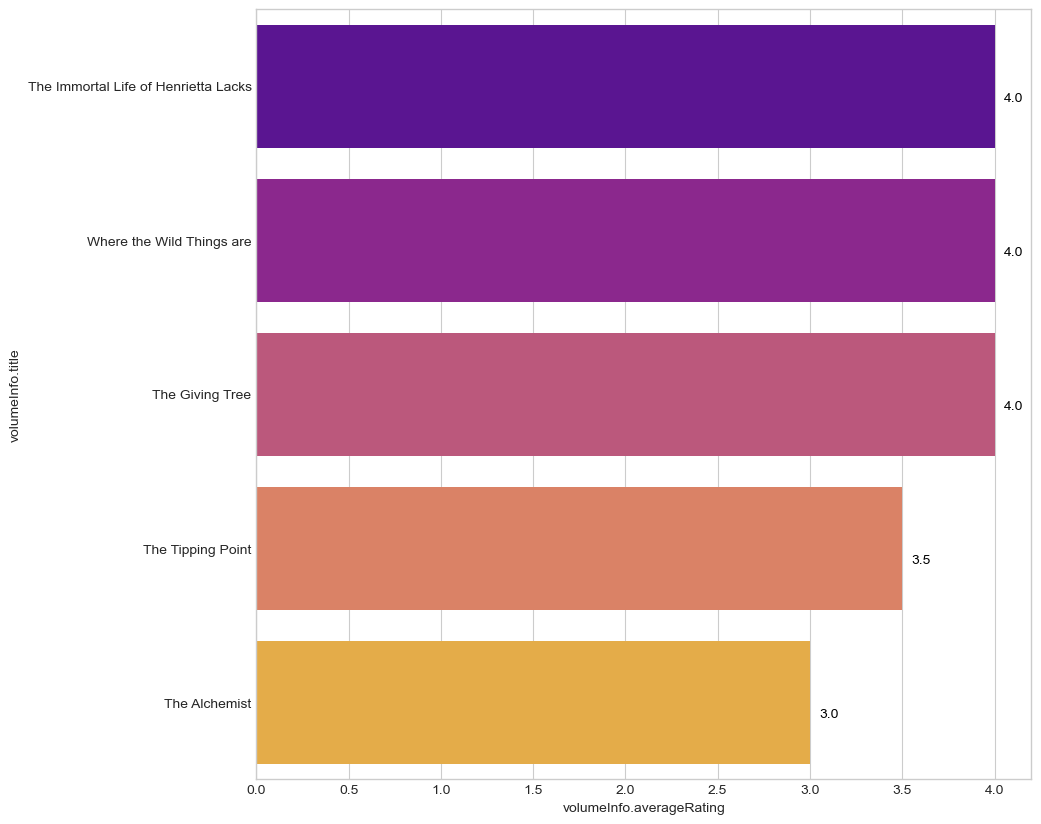

In [47]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))

data = top_fifteen_books.sort_values(by='volumeInfo.averageRating', ascending=False).head(15)
gr = sns.barplot(x="volumeInfo.averageRating", y="volumeInfo.title", data=data, palette="plasma")

for i in gr.patches:
    gr.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

In [48]:
#Top 15 authors
# to remove missing as category
author_table=cleaned_df[cleaned_df['volumeInfo.authors']!='Missing']
author_table

# Get top 15 authors

top_fifteen_authors = author_table.groupby('volumeInfo.authors')['volumeInfo.title'].count().reset_index().sort_values('volumeInfo.title', ascending=False).head(15).set_index('volumeInfo.authors')
top_fifteen_authors.head(15)

,volumeInfo.title
volumeInfo.authors,
DK,75
Isaac Asimov,36
Betty Neels,28
Blake Pierce,24
Bokkaku Dojinshi,23
Baby Professor,19
Library of Congress Copyright Office,19
DK Eyewitness,14
Hugh Johnson,13


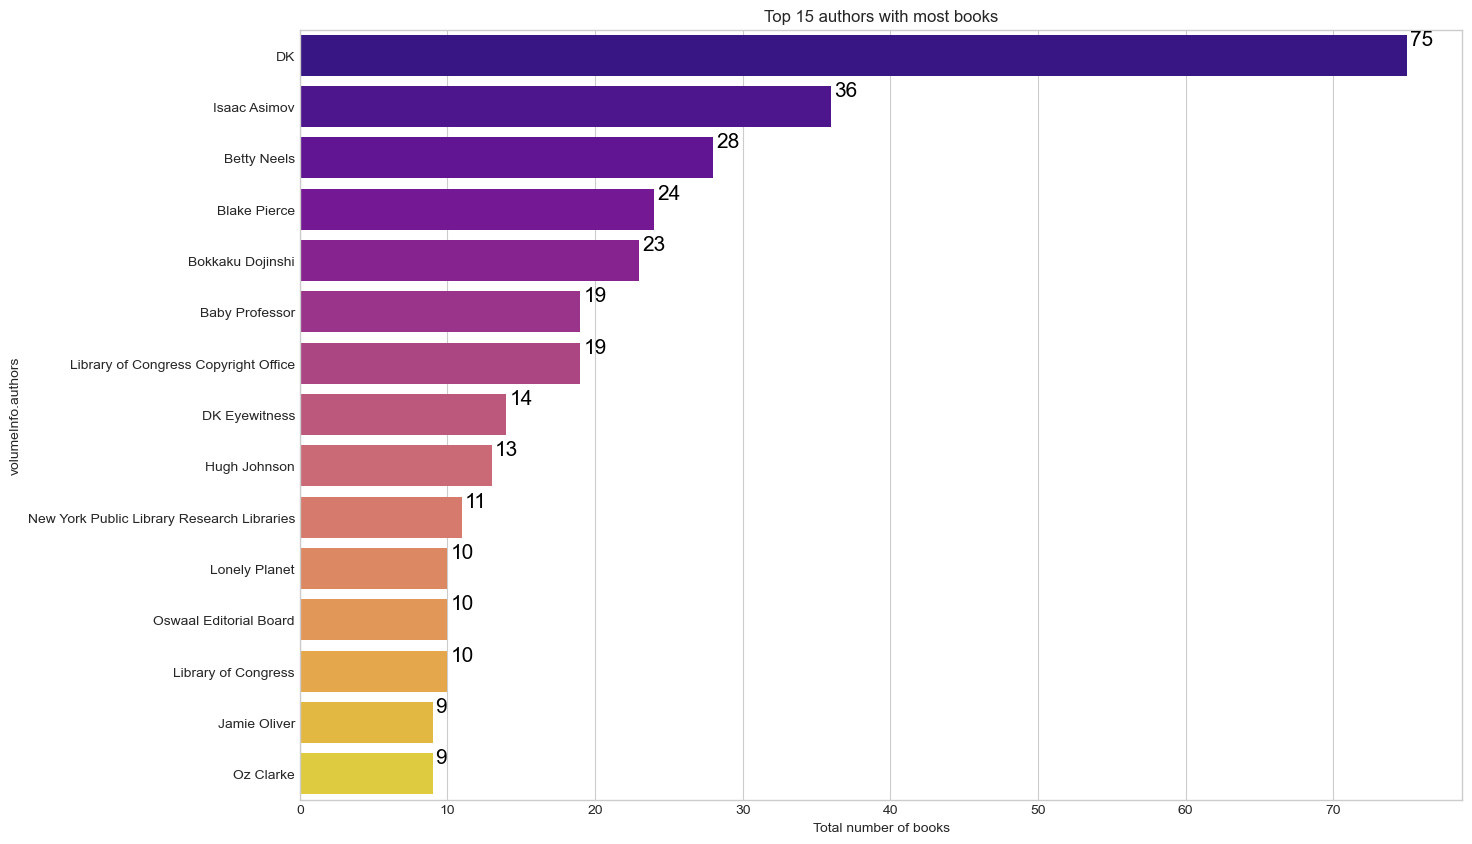

In [49]:
#Top fifteen Authors with most books-Bar Chart
# Observation: Based on our data, DK has the highest books written, which is 217, followed by Blake Pierce, Library of Congress
# Copyright Office and Jupiter Kids. 'Missing' category is removed prior to creating this chart to present accurate data.
plt.figure(figsize=(15,10))
ax = sns.barplot(top_fifteen_authors['volumeInfo.title'], top_fifteen_authors.index, palette='plasma')

ax.set_title("Top 15 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [50]:
#Top 20 Categories of Books

categories = cleaned_df['volumeInfo.categories'].value_counts()
categories_df = categories.reset_index() 
categories_df.columns = "Categories", "Volume"
categories_df = categories_df.set_index("Categories")

categories_df.head(20)

,Volume
Categories,
Fiction,1534
Business & Economics,1060
Cooking,798
Biography & Autobiography,668
Education,630
Juvenile Fiction,551
Computers,486
Juvenile Nonfiction,433
Psychology,415


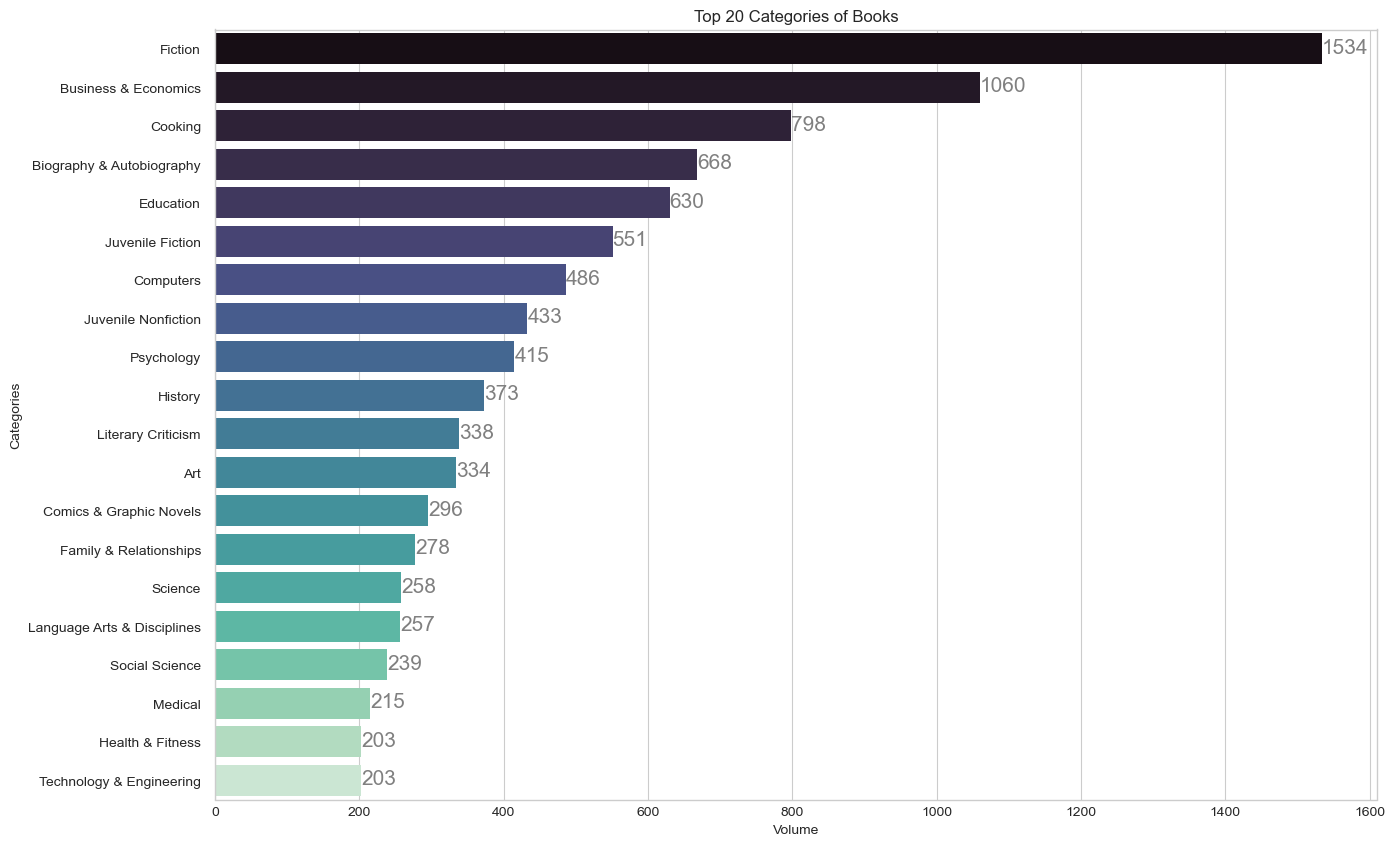

In [51]:
#Observation: Fiction is the most common category of books from the collected data. Business and Economics is the only other \
#category with over 1000 books. All categories after the top 20 have less than 200 books per category.

plt.figure(figsize=(15,10))
ax = sns.barplot(categories_df.head(20)['Volume'], categories_df.head(20).index, palette='mako')

ax.set_xlabel("Volume")
ax.set_title('Top 20 Categories of Books')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round(i.get_width())),fontsize = 15, color ='grey')
plt.show()

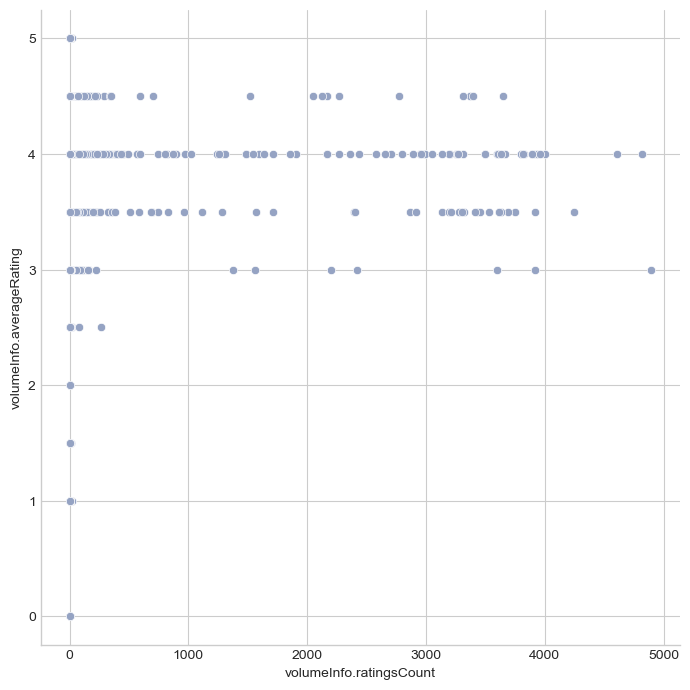

In [52]:
#Find relationship between average rating and rating count
#Most of the books were rated 4.0, followed by 3.5.
ax = sns.relplot(data=cleaned_df,
                 x="volumeInfo.ratingsCount",
                 y="volumeInfo.averageRating",
                 color = '#95a3c3',
                 sizes=(400, 600), 
                 height=7, 
                 marker='o')

In [53]:
#Top fifteen Publishers
# to remove missing as category
publisher_table=cleaned_df[cleaned_df['volumeInfo.publisher']!='Missing']
top_15_publisher = publisher_table.groupby('volumeInfo.publisher')['volumeInfo.title'].count().reset_index().sort_values('volumeInfo.title', ascending=False).head(15).set_index('volumeInfo.publisher')
top_15_publisher.head(15)

,volumeInfo.title
volumeInfo.publisher,
Routledge,398
Hachette UK,365
Penguin,318
John Wiley & Sons,308
Simon and Schuster,290
National Geographic Books,221
Random House,202
Springer,193
Penguin UK,150


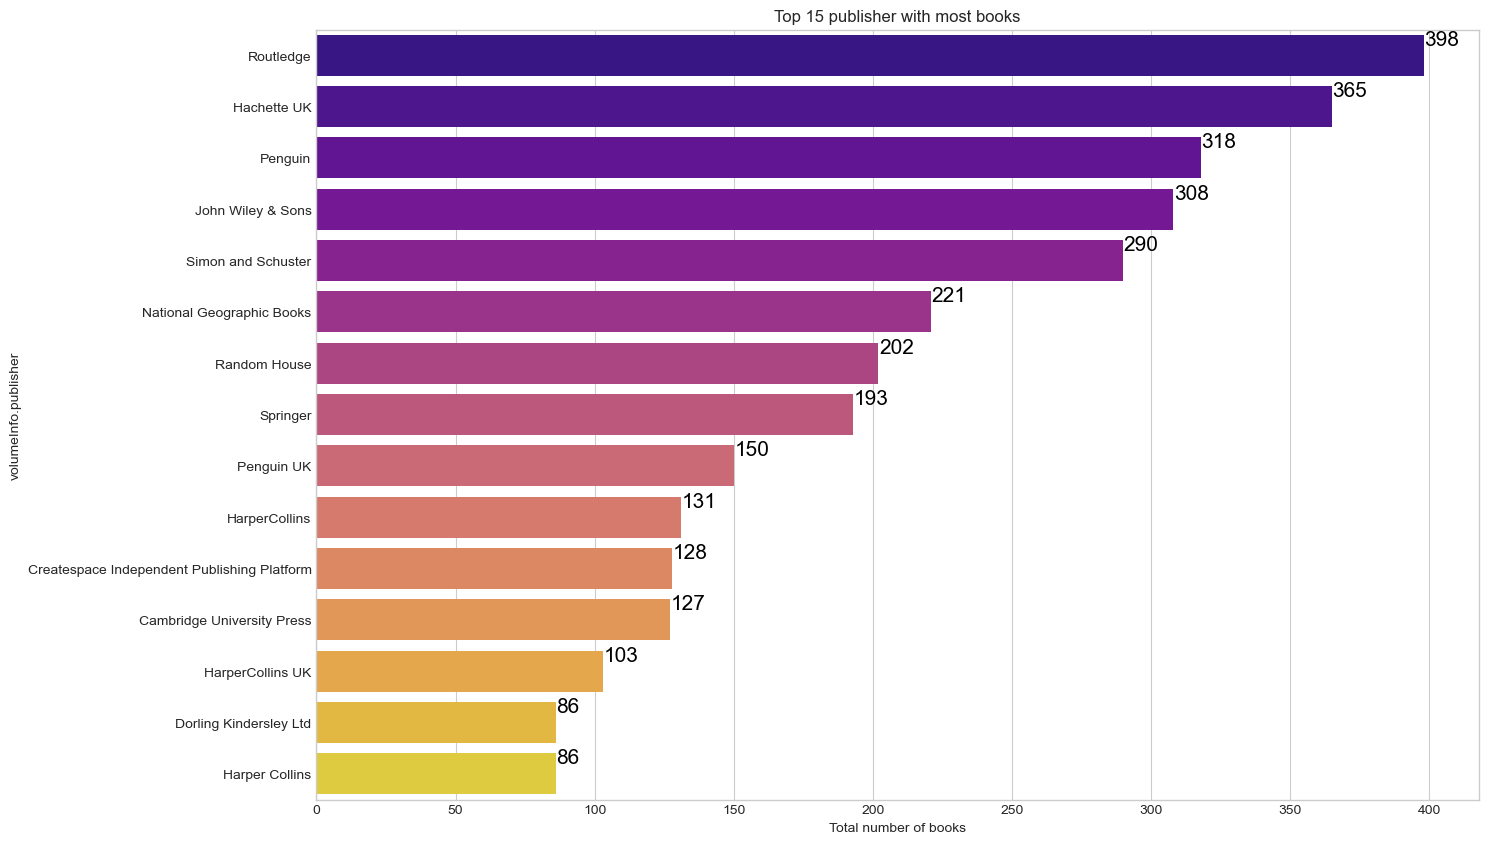

In [54]:
#Top fifteen Publishers-Bar Chart
#Observation: Routledge published the most, with 2,324 different books based on our data. Subsequently, Hachette UK and Simon and Schuster ranked second and third with 1,844 and 1,700 books published respectively.

plt.figure(figsize=(15,10))
ax = sns.barplot(top_15_publisher['volumeInfo.title'], top_15_publisher.index, palette='plasma')

ax.set_title("Top 15 publisher with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

Text(0.5, 0, 'Average rating')

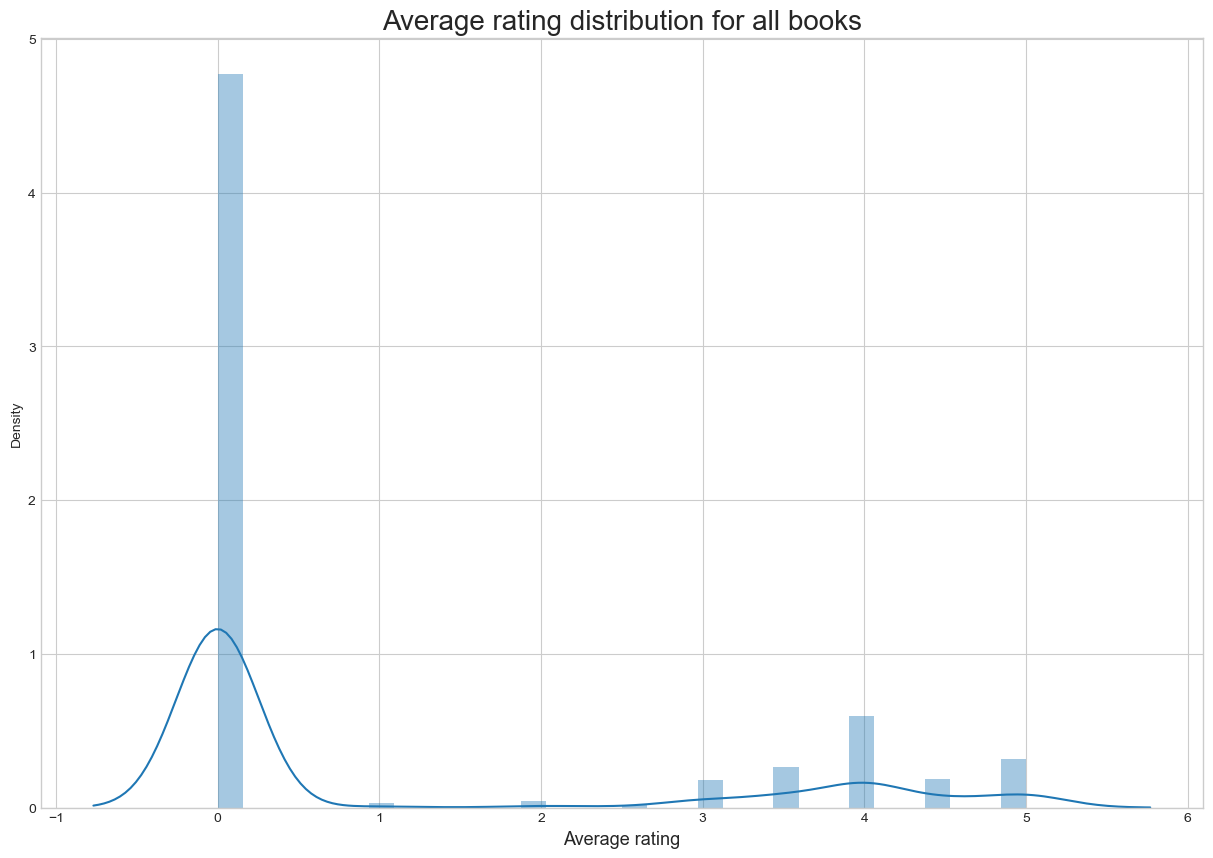

In [55]:
#Distribution of average_rating
#Should we include those with 0 ratings? 
cleaned_df['volumeInfo.averageRating'] = cleaned_df['volumeInfo.averageRating'].astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(cleaned_df['volumeInfo.averageRating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

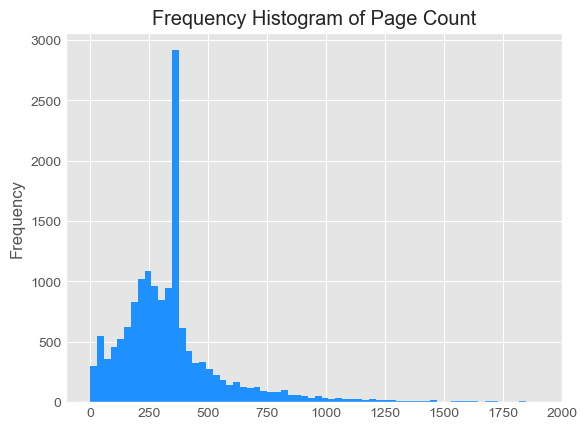

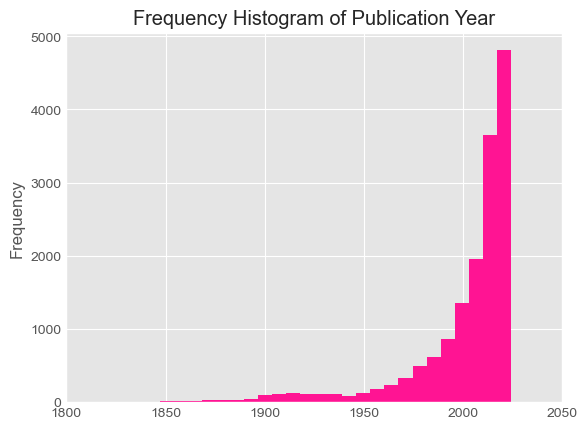

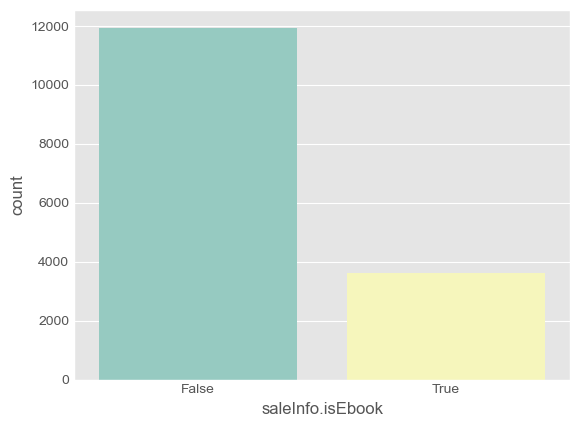

In [56]:
#Histogram of pagecount

x = cleaned_df['volumeInfo.pageCount']
plt.style.use('ggplot')
plt.hist(x, bins=1000, color ='dodgerblue')
plt.gca().set(title='Frequency Histogram of Page Count', ylabel='Frequency')
plt.xlim(xmin=-100, xmax = 2000)
plt.show()

##The minimum page count is 1 and the maximum page count is 99998. From this plot it can be seen that most of the books have
##page count of 250 to 500 pages. 


#Histogram of published year

x = cleaned_df['volumeInfo.publishedYear']
plt.style.use('ggplot')
plt.hist(x, bins=50, color ='deeppink')
plt.gca().set(title='Frequency Histogram of Publication Year', ylabel='Frequency')
plt.xlim(xmin=1800, xmax = 2050)
plt.show()

##From this plot it is observed that most of the publication years is 2000. There are some books from the year 1700. 


#Count plot of ebook availability

sns.countplot(x ='saleInfo.isEbook', data = cleaned_df, palette = "Set3")
plt.show()

##It is observed that the Ebook availability mostly is false. This means that the books are not available as ebook. 

Text(0.5, 1.0, 'View Status')

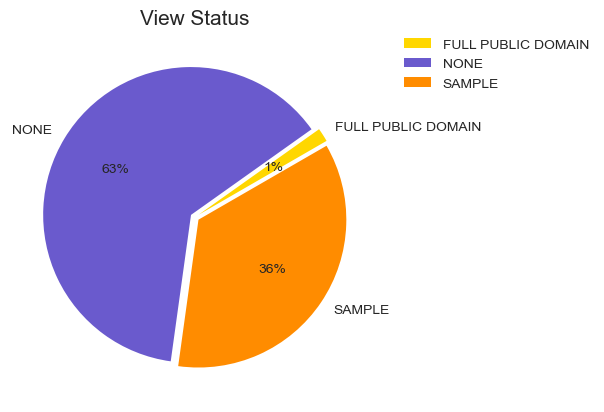

In [92]:
#The View Status of all the books
#Observation: The pie chart shows the percentages of the books that can be viewed. Majority of the books cannot be viewed \
#(labelled 'NONE') while only 1% are available as full public domain. The books in public domain can legally be used or \
#referenced without permission. Thus all books under public domain have full viewing access available online.

view_status = cleaned_df['accessInfo.accessViewStatus'].value_counts()
view_status_df = view_status.reset_index() 
view_status_df.columns = "Status", ""

colors = ['gold', 'slateblue', 'darkorange']
explode = (0.03, 0.03, 0.03)
view_status_df.groupby(['Status']).sum().plot(kind='pie', y="", autopct='%1.0f%%', colors=colors, explode=explode,
                                             startangle=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('View Status', fontsize = 15)

Text(0.5, 1.0, 'Viewability of Samples')

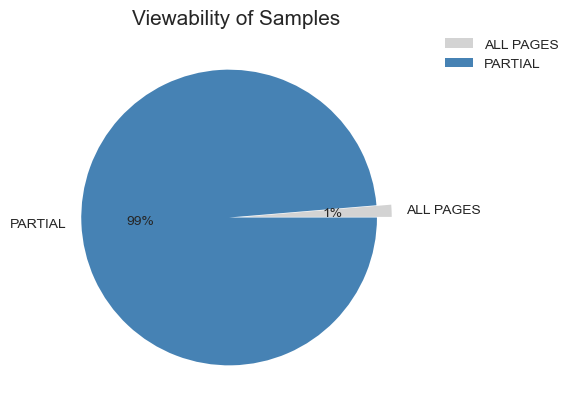

In [93]:
#The Viewability of Samples
#Observation: The pie chart showcases the viewability of the books previously categorized as 'Samples'. Of these samples, most \
#of the books have a small segment available for viewing while 1% are available in full.

sample_only_df = cleaned_df[['accessInfo.accessViewStatus','accessInfo.viewability']]
sample_only_df = sample_only_df.set_index('accessInfo.accessViewStatus')
sample_only_df = sample_only_df.loc['SAMPLE']

viewability = sample_only_df['accessInfo.viewability'].value_counts()
viewability_df = viewability.reset_index() 
viewability_df.columns = "Viewability", ""
viewability_df = viewability_df.set_index('Viewability')

colors = ['lightgray', 'steelblue']
explode = (0.05, 0.05)
viewability_df.groupby(['Viewability']).sum().plot(kind='pie', y='', autopct='%1.0f%%', colors=colors,explode=explode)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Viewability of Samples', fontsize = 15)

In [70]:
#ePub and PDF access [Both, ePub only, PDF only, None]

pd.options.mode.chained_assignment = None 
epub_pdf_df = cleaned_df[['accessInfo.epub.isAvailable','accessInfo.pdf.isAvailable']]
epub_pdf_df.columns = "accessInfo.epub.isAvailable", "accessInfo.pdf.isAvailable"
epub_pdf_df['Availability']=0

def avail(epub_pdf_df):
    if (epub_pdf_df ['accessInfo.epub.isAvailable'] == True) & (epub_pdf_df ['accessInfo.pdf.isAvailable'] == True):
        return 'Both'
    elif (epub_pdf_df ['accessInfo.epub.isAvailable'] == True) & (epub_pdf_df ['accessInfo.pdf.isAvailable'] == False):
        return 'ePub only'
    elif (epub_pdf_df ['accessInfo.epub.isAvailable'] == False) & (epub_pdf_df ['accessInfo.pdf.isAvailable'] == True):
        return 'PDF only'
    elif (epub_pdf_df ['accessInfo.epub.isAvailable'] == False) & (epub_pdf_df ['accessInfo.pdf.isAvailable'] == False):
        return 'None'
    
epub_pdf_df['Availability'] = epub_pdf_df.apply(avail, axis = 1)
availability = epub_pdf_df['Availability'].value_counts()
c = availability.reset_index()
availability_df.columns = "Type", "Amount"
availability_df

,Type,Amount
0,None,9094
1,Both,2431
2,PDF only,2401
3,ePub only,1649


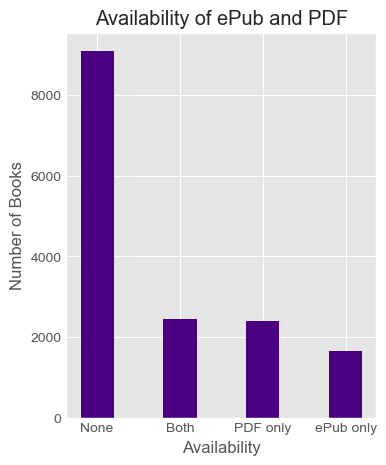

In [96]:
#Observation: Most of the books have neither formats available. 

fig = plt.figure(figsize = (4,5))

ax = plt.bar(availability_df['Type'], availability_df['Amount'], color ='indigo',width = 0.4)
plt.xlabel("Availability")
plt.ylabel("Number of Books")
plt.title("Availability of ePub and PDF")
plt.show()